# Actividad Perceptron Multicapa
- Objetivo: Crear un modelo para obtener un 97% de Test accuracy con un máximo de 2 capas ocultas sin usar regularización l2, en no más de 25 épocas.

Tiempo máximo: 1 hora

- Nota: Utilizar las técnicas de reguarización y optimización

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras import backend as K
K.clear_session()


mnist = keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)  
print(y_test.shape)  

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- Se modifica la forma de los datos de 2-d (n, 28, 28) a 1-d (n, 784)

In [3]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(x_train.shape) # (60000, 784)
print(y_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(y_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Leer Dataset

In [4]:
epoch = 21
verbose = 0
batch = 50

In [5]:
K.clear_session()

In [6]:
def make_model():
    model = Sequential()
    
    model.add(Dense(60, input_shape = (784, )))
    model.add(BatchNormalization(momentum=0.99)) 
    model.add(Activation('relu'))
    model.add(Dense(60))
    model.add(BatchNormalization(momentum=0.99)) 
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Fit
model = make_model()

model.summary()
# lista de datos
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = 1)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
activation (Activation)      (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60)                240       
_________________________________________________________________
activation_1 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

In [7]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0542 - accuracy: 0.9755


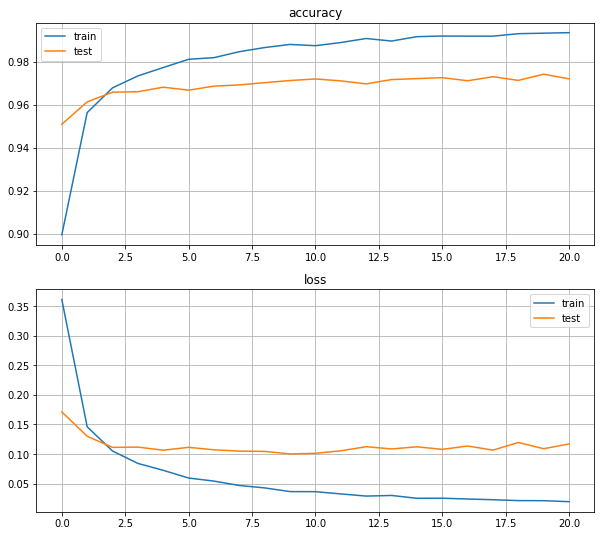

In [8]:
# plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()